## Data Client

This notebook shows how to use the dataclient Python library to retrieve timeseries data from the time series service in a very fast manner.

For developers whishing to implement their own web service calls, you can find the REST documentation here:
https://proba-v-mep.esa.int/api/timeseries/apidocs/

### Defining area of interest
We first need to have a polygon that defines our area of interest. We'll read if from a GeoJson file and show it on the map.

**Note that this map may not be visible in the exported version of this notebook!**

In [1]:
import geopandas as gpd
import pandas as pd
polygons = gpd.read_file("reserves.geojson")
test_area = polygons[polygons.Reservaat == "De Maat"]
test_area = test_area.iloc(0)[0]

In [2]:
from ipyleaflet import Map,DrawControl,GeoJSON
from shapely.geometry import mapping, shape

m = Map(center=[test_area.geometry.centroid.y,test_area.geometry.centroid.x], zoom=11)
dc = DrawControl()
m.add_control(dc)

m.add_layer(GeoJSON(data=mapping(test_area.geometry)))

m

Map(center=[51.233067331226415, 5.190242911313236], controls=(DrawControl(layer=FeatureGroup(), polygon={'shapeOptions': {}}, polyline={'shapeOptions': {}}),), layers=(TileLayer(attribution='Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors', options=['tile_size', 'attribution', 'detect_retina', 'min_zoom', 'max_zoom', 'opacity'], url='https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png'), GeoJSON(data={'coordinates': [(((5.184039601416243, 51.22907932792965), (5.183539938666841, 51.22435960736138), (5.180704955317716, 51.224439381411614), (5.180694380964436, 51.225738441324076), (5.181010466750406, 51.226932123812304), (5.180817587557941, 51.2289949089276), (5.180277101348199, 51.22975182513206), (5.183850704640404, 51.22967508139692), (5.183900043170854, 51.22964693117814), (5.184016707151564, 51.22956385269194), (5.184075354073157, 51.22954027284599), (5.184039601416243, 51.22907932792965)),), (((5.190325635313143, 51.22970555793137), (5.192703821427825, 51.229660028577634), (5.192984278781979, 51.229655755188425), (5.194386357944121, 51.22962279030763), (5.197041238690731, 51.22956944657435), (5.197028336179328, 51.229258985270036), (5.192911920300403, 51.22952995315521), (5.19051332367695, 51.22946438648533), (5.189886755418861, 51.22920338278882), (5.190325635313143, 51.22970555793137)),), (((5.190325635313143, 51.22970555793137), (5.188854606031023, 51.22802396605113), (5.188876085213834, 51.22788128701124), (5.188603020186935, 51.22788550033692), (5.188490476685546, 51.22788743988168), (5.188460951494778, 51.22788764472218), (5.188277993556624, 51.224936352139785), (5.188267181081984, 51.22400708864048), (5.188246672561094, 51.22347071709327), (5.188046411055941, 51.223311036201835), (5.1881288450222, 51.22275193398081), (5.184425021354289, 51.2229490631791), (5.183971507067092, 51.22297421007538), (5.183958388709012, 51.223384507268456), (5.184008287553559, 51.223705144648854), (5.184004152177357, 51.223996025800055), (5.184013925382297, 51.22434359122691), (5.184001779434269, 51.22438770814449), (5.183882998049639, 51.22456002725409), (5.18388064611444, 51.22463652206861), (5.183904977475221, 51.22518329634441), (5.18392626785899, 51.22523992971377), (5.183976860236847, 51.22528361371644), (5.18402751212328, 51.22533077419808), (5.184098339826867, 51.22547629142939), (5.184093980918656, 51.22554353070714), (5.184022402217609, 51.22567149012139), (5.184115558028766, 51.226459972893316), (5.184134802390999, 51.22671592958522), (5.183994724107518, 51.22672616648295), (5.183997238374671, 51.22676438794684), (5.184248615196506, 51.229105695381094), (5.18426007260485, 51.22923308159128), (5.184270010881974, 51.22937901878169), (5.184294085547489, 51.229910729284136), (5.184296803115072, 51.229960537778744), (5.184330207054417, 51.230603426726674), (5.184333897562624, 51.23060340125344), (5.184339396692521, 51.23102283900274), (5.184399842550894, 51.23247204662548), (5.184403250268084, 51.232561248599076), (5.184403392306618, 51.23256935919062), (5.184405563726078, 51.2325878846811), (5.184468244626293, 51.23405909244169), (5.184475101150695, 51.234239813323086), (5.184475425846051, 51.23425835154873), (5.184475750541667, 51.234276889774215), (5.184488876682182, 51.23460473151455), (5.185889467159469, 51.23458346724736), (5.185950168157891, 51.23457145991995), (5.185973673420728, 51.23454348666476), (5.186042645759739, 51.23447695934581), (5.186066796677963, 51.23438061395817), (5.186060705182491, 51.2342439216898), (5.186049623071973, 51.23403310114145), (5.186071911509794, 51.23404105855344), (5.18607935550997, 51.2340444839668), (5.186086920068219, 51.23405486054898), (5.186090066787577, 51.23412899977559), (5.186095629696543, 51.23423556856278), (5.186318683873734, 51.23432440967213), (5.186513165747206, 51.23446791084069), (5.186529979279642, 51.234479382055625), (5.186522860688263, 51.234494494889525), (5.186450482989811, 51.23457726919274), (5.186434259358187, 51.23459939792495), (5.18670

This notebook uses the MEP dataclient library. It is available at https://bitbucket.org/vitotap/mep-dataclient.

Now we want to retrieve a timeseries for our polygon. Before we can do this, we need to know which 'layer' to query.
This list of layers can also be retrieved from the web service:

In [3]:
import requests
response = requests.get("https://proba-v-mep.esa.int/api/timeseries/v1.0/ts/")
if response.status_code == 200:
    layerlist = response.json()['layers']
    layers = [layer['name'] for layer in layerlist if layer['name'].startswith('S2_') or layer['name'].startswith('PROBA') or layer['name'].startswith('BIOPAR')]
else:
    raise IOError(response.text)
layers

['S2_FAPAR_V102_WEBMERCATOR2',
 'BIOPAR_LAI_V2_GLOBAL',
 'S2_SCENECLASSIFICATION',
 'BIOPAR_FAPAR_V1_GLOBAL',
 'PROBAV_L3_S10_TOC_NDVI_333M',
 'S2_MARKERMEER',
 'BIOPAR_FCOVER300_V1_GLOBAL',
 'BIOPAR_FCOVER_V1_GLOBAL',
 'BIOPAR_LAI300_V1_GLOBAL',
 'S2_FAPAR_CLOUDCOVER',
 'BIOPAR_FAPAR300_V1_GLOBAL',
 'BIOPAR_FAPAR_V2_GLOBAL',
 'BIOPAR_FCOVER_V2_GLOBAL',
 'S2_NDVI',
 'S2_LAI',
 'S2_FAPAR',
 'BIOPAR_LAI_V1_GLOBAL',
 'BIOPAR_NDVI300_V1_GLOBAL',
 'BIOPAR_NDVI_V2_GLOBAL',
 'S2_FAPAR_CLOUDCOVER_SC',
 'BIOPAR_WB300_V1_GLOBAL',
 'S2_FCOVER',
 'BIOPAR_BA300_V1_GLOBAL']

All of these layers can be queried, so let's go multitemporal, and query a PROBA-V and Sentinel 2 timeseries for the same area.

In [4]:
start = "2018-03-01"
end = "2018-12-01"
import dataclient
sentinel2_data = dataclient.get_timeseries(test_area,"S2_NDVI",start,end)
probav_data = dataclient.get_timeseries(test_area,"PROBAV_L3_S10_TOC_NDVI_333M",start,end)

The result is a Pandas Series object, which can be plotted immediately:

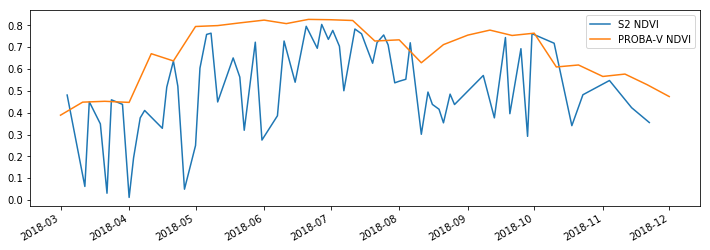

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
sentinel2_data.name="S2 NDVI"
probav_data.name = "PROBA-V NDVI"
sentinel2_data.dropna().plot(figsize=(12,4))
probav_data.dropna().plot(figsize=(12,4))
plt.legend()
plt.show()

The Sentinel 2 data is rather noisy, even though cloud filtering has occured. This cloud filtering is based on the Sen2Cor scene classification, which does not manage to remove all noise. (Mainly undetected cloud shadow.)
One classic solution is to apply smoothing, this is also possible through a web service, that currently implements a Whittaker smoothing algorithm.
The PROBA-V data is less noisy, because it is based on a 10-daily composite. This means that each data point is a combination of 10 daily images, where only the best value is retained.

In [6]:
import dataclient
sentinel2_smooth = dataclient.get_timeseries(test_area,"S2_NDVI",start,end,endpoint="http://pep.vgt.vito.be:8080/TimeseriesSmooth/v1.0/ts/")
probav_smooth = dataclient.get_timeseries(test_area,"PROBAV_L3_S10_TOC_NDVI_333M",start,end,endpoint="http://pep.vgt.vito.be:8080/TimeseriesSmooth/v1.0/ts/")

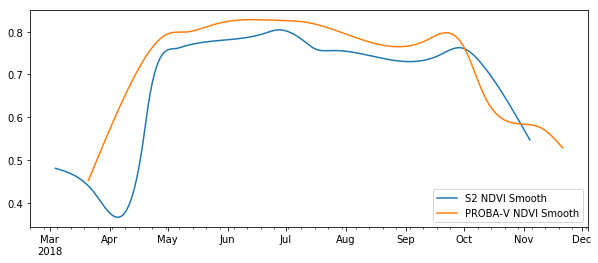

In [7]:
sentinel2_smooth.name="S2 NDVI Smooth"
probav_smooth.name = "PROBA-V NDVI Smooth"
sentinel2_smooth.dropna().plot(figsize=(10,4))
probav_smooth.dropna().plot(figsize=(10,4))
plt.legend()
plt.show()

As we can see, the smoothing clearly reduces the effect of the clouds on the Sentinel 2 data.

## Timeseries dissection

Up to this point, we have only used the average pixel value for our timeseries analysis. However, we may want to derive more detailed statistics such as percentiles. 
To help you out, we added support for histograms to our web service and Python client.

The result of the 'dataclient.get_histogram' function is a time series of histograms, represented by a Pandas Dataframe.

In [8]:
import dataclient
avg_timeseries = dataclient.get_timeseries(test_area,"S2_NDVI", start, end)
histogram = dataclient.get_histogram(test_area,"S2_NDVI", start, end)

/opt/rh/rh-python35/root/usr/lib64/python3.5/site-packages/pandas/core/indexes/api.py:57: RuntimeWarning: unorderable types: str() < float(), sort order is undefined for incomparable objects
  union = _union_indexes(indexes)
/opt/rh/rh-python35/root/usr/lib64/python3.5/site-packages/pandas/core/indexes/api.py:57: RuntimeWarning: unorderable types: float() < str(), sort order is undefined for incomparable objects
  union = _union_indexes(indexes)
/opt/rh/rh-python35/root/usr/lib64/python3.5/site-packages/pandas/core/indexes/api.py:87: RuntimeWarning: unorderable types: float() < str(), sort order is undefined for incomparable objects
  result = result.union(other)
/opt/rh/rh-python35/root/usr/lib64/python3.5/site-packages/pandas/core/indexes/api.py:87: RuntimeWarning: unorderable types: str() < float(), sort order is undefined for incomparable objects
  result = result.union(other)


In [9]:
histogram = histogram.drop('NaN',axis=1)
histogram.columns = pd.to_numeric(histogram.columns)
histogram

-0.080  -0.076  -0.068  -0.064  -0.060  -0.056  -0.052  -0.048  \
2018-03-02     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-04    20.0     2.0    16.0     6.0    19.0    34.0    15.0    23.0   
2018-03-07     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-09     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-12     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-14     NaN     NaN     NaN     NaN     6.0     6.0     NaN     NaN   
2018-03-17     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-19     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-22     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-24     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-27     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03-29    61.0     NaN     2.0     NaN     9.0     NaN     4.0     NaN   
2018-04-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-03     9.0     NaN     NaN     NaN     NaN     NaN     NaN     3.0   
2018-04-06     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-08     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-11     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-13     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-16    69.0     NaN    11.0     NaN    13.0     NaN     6.0     9.0   
2018-04-18     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-21     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-23   154.0     3.0    24.0     4.0     NaN    11.0     9.0    19.0   
2018-04-26     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04-28     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-05-01     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-05-03     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-05-06     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-05-08     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-05-11     NaN     NaN     NaN     NaN     NaN     3.0     NaN     2.0   
2018-05-13     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2018-08-19     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-08-21     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-08-24   167.0     5.0     9.0     8.0    20.0    34.0    19.0     6.0   
2018-08-26     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-08-29     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-08-31     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-09-03     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-09-05     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-09-08    75.0     NaN     NaN     3.0     NaN     3.0     NaN     NaN   
2018-09-10     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-09-13     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-09-18     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-09-20     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-09-23     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-09-25     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-09-28     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-09-30     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-10-10     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-10-18     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-10-20     NaN     NaN     NaN

Based on these histograms, we can derive statistics that can also be plotted:

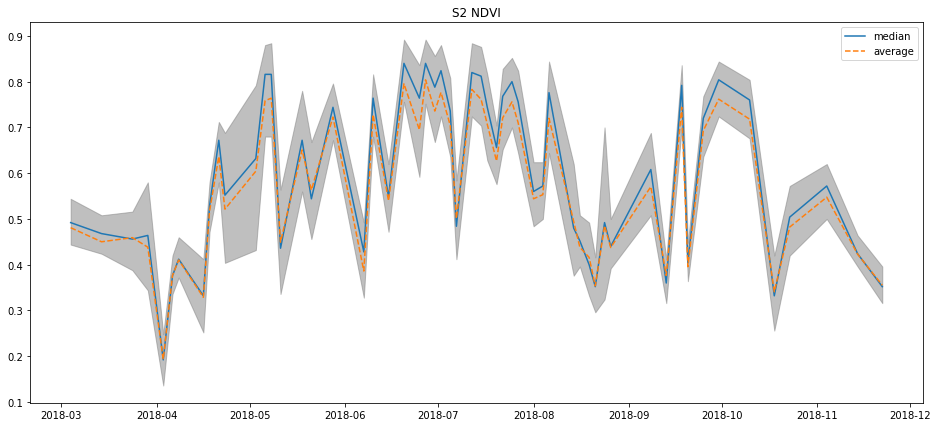

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def quantile(row,quantile):
    cumsum = row.dropna().cumsum()
    #filter out rows with too little data, these are very often contaminated with remaining cloud or shadow
    if len(row.dropna())/len(row) < 0.4:
        return np.NaN
    return cumsum.index[np.searchsorted(cumsum,cumsum.max()*quantile)[0]]

    
median = histogram.apply(lambda row:quantile(row,0.5),axis=1)
high = histogram.apply(lambda row:quantile(row,0.95),axis=1)
low = histogram.apply(lambda row:quantile(row,0.05),axis=1)

q1 = histogram.apply(lambda row:quantile(row,0.25),axis=1).dropna()
q2 = histogram.apply(lambda row:quantile(row,0.75),axis=1).dropna()

fig, axes = plt.subplots(1, 1, figsize=(16,7))

plt.fill_between(q1.index,q2,q1,color="gray",alpha=0.5)
plt.plot(median.dropna(),label="median")
#plt.plot(high.dropna(),label="0.95 percentile")
#plt.plot(low.dropna(),label="0.05 percentile")

plt.plot(avg_timeseries.filter(median.dropna().index),label="average", linestyle="--")
plt.title("S2 NDVI")
plt.legend()
plt.show()


## Timeseries timelapse
A final way to visualize the timeseries in full detail, is to retrieve the actual images, so we can plot them in an animated timelapse. To access the web service (WCS) that allows us to download these images, we need to provide our username and password. (The same as used for https://www.vito-eodata.be or https://terrascope.be )

In [ ]:
import getpass
import ipywidgets as widgets

username = widgets.Text(
    value='',
    placeholder='',
    description='Username:',
    disabled=False
)
username


In [ ]:
password = getpass.getpass()
credentials=(username.value, password)

With the following call, we download a set of images based on the bounding box of out test area. They are saved into the specified output directory. ('de_maat_rgb') We try to download an image for each available date. For some dates the image may be fully clouded, and for other dates the bounding box may not intersect the available data, which will result in an error that can be ignored.

In [19]:
from dateutil.parser import parse
import pandas as pd
import dataclient
dataclient.MepLayer(credentials, "CGS__CGS_S2_10M_BANDS", "CGS", "https://sentineldata.vito.be/ows").download_bbox("de_maat_rgb_2018",test_area.geometry,startdate=start,enddate=end,verbose=False)

query date: 2018-03-01T10:30:13.000Z
b'<ns0:GetCoverage xmlns:ns0="http://www.opengis.net/wcs/2.0" xmlns:ns2="http://www.opengis.net/WCS_service-extension_interpolation/1.0" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" service="WCS" version="2.0.1" xsi:schemaLocation="http://www.opengis.net/wps/1.0.0 http://schemas.opengis.net/wps/1.0.0/wpsAll.xsd">\n    \n    <ns0:CoverageId>CGS__CGS_S2_10M_BANDS</ns0:CoverageId>\n    <ns2:Interpolation>\n        <ns2:globalInterpolation>http://www.opengis.net/def/interpolation/OGC/1/cubic</ns2:globalInterpolation>\n    </ns2:Interpolation>\n    <ns0:DimensionSlice>\n        <ns0:Dimension>time</ns0:Dimension>\n        <ns0:SlicePoint>2018-03-01T10:30:13.000Z</ns0:SlicePoint>\n    </ns0:DimensionSlice>\n    <ns0:DimensionTrim>\n        <ns0:Dimension>Long</ns0:Dimension>\n        <ns0:TrimLow>5.1801845641299575</ns0:TrimLow>\n        <ns0:TrimHigh>5.208674897356835</ns0:TrimHigh>\n    </ns0:DimensionTrim>\n    <ns0:DimensionTrim>\n        <ns

To filter our retrieved images by cloudcover, we retrieve a timeseries that contains a cloud percentage.

In [13]:
clouds = dataclient.get_timeseries(test_area,"S2_FAPAR_CLOUDCOVER",start,end)

The retrieved images contain 4 10m bands, with reflectance values from 0 to 10000, we define a function that plots this as RGB.

In [14]:
from rasterio.plot import show
def show_sentinel2_rgb(dataset,axis=None):
    band1 = np.clip((dataset.read(3,masked=True)-200)/1600.,0.0,1.0)
    band2 = np.clip((dataset.read(2,masked=True)-200)/1600.,0.0,1.0)
    band3 = np.clip((dataset.read(1,masked=True)-200)/1600.,0.0,1.0)
    
    rgb = np.dstack([band1,band2,band3])
    return axis.imshow(rgb,animated=True,vmin=0.0,vmax=1.0)

In [15]:
import pandas as pd
date_selection=["2018-05-06 00:00:00","2018-05-11 00:00:00","2018-05-26 00:00:00","2018-06-23 00:00:00"]
pd.to_datetime(date_selection)

DatetimeIndex(['2018-05-06', '2018-05-11', '2018-05-26', '2018-06-23'], dtype='datetime64[ns]', freq=None)

Now we can convert this into a timelapse, which shows the image timeseries combined with the average timeseries.

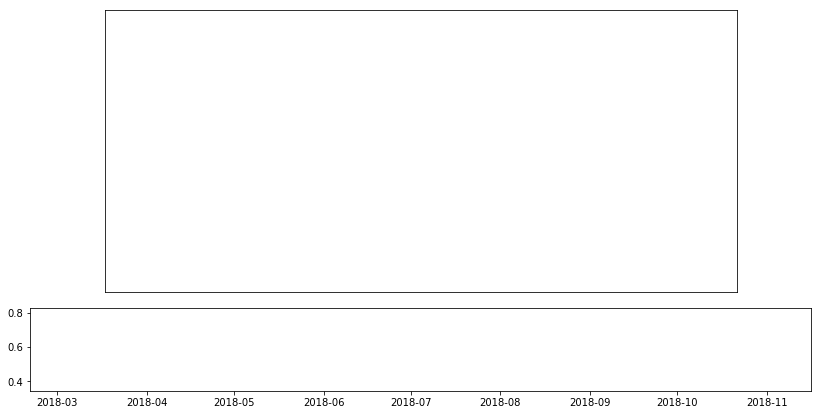

In [26]:
%matplotlib inline

import rasterio
from IPython.display import HTML
from os import listdir
from os.path import isfile, join
import re
import matplotlib.animation as anim
import matplotlib.pyplot as plt
import numpy as np

#https://tomroelandts.com/articles/how-to-create-animated-gifs-with-python

image_paths = [f for f in listdir("de_maat_rgb_2018") if f.endswith("tiff") and isfile(join("de_maat_rgb_2018", f))]
image_paths.sort()

size=(800, 300)
fig = plt.figure(figsize=(14, 7))
#fig.set_size_inches(size[0] / 100, size[1] / 100)
ax1=plt.subplot2grid((4, 1), (0, 0), rowspan=3)
ax2=plt.subplot2grid((4, 1), (3, 0))
ax1.set_xticks([])
ax1.set_yticks([])

images = []
prog = re.compile(".*([0-9]{6}).*")
i = 0
for f in image_paths:
    with rasterio.open(join("de_maat_rgb_2018", f)) as dataset:
        fapar = dataset.read(1,masked=True)
        #print(fapar.count())
        if fapar.count() > 10000:                        
            date = pd.to_datetime(prog.match(f).group(1),yearfirst=True)    
            #if date in pd.to_datetime(date_selection):
            if date in sentinel2_smooth.dropna().index and date in clouds and clouds[date]<0.1:                
                plt_txt = ax1.text(0, 0, date.strftime("%Y-%m-%d"), color='red',fontsize=12)
                plt_im = show_sentinel2_rgb(dataset,ax1)
                graph, = ax2.plot(sentinel2_smooth.dropna())
                #point, = ax2.plot(date, filtered[date], 'g*')
                line =ax2.axvline(x=date,animated=True)
                images.append([plt_im,graph,line,plt_txt])
            #else:
            #    images.append([plt_im,graph])
            
animation = anim.ArtistAnimation(fig, images)
HTML(animation.to_jshtml())

This timelapse can also be exported to a file.

In [21]:
from matplotlib.animation import PillowWriter,ImageMagickWriter
animation.save("de_maat_timelapse.gif", writer=PillowWriter(fps=1))

## Timeseries mass download
The code below shows how to a timeseries for each polygon in a geopandas dataframe. This is often required when investigating multiple areas

In [22]:
import pandas as pd
all_dates = sorted(set([x[:10] for x in requests.get("https://proba-v-mep.esa.int/api/catalog/v2/CGS_S2_FAPAR/times").json() if pd.to_datetime(x).date() >= pd.to_datetime(start).date() and pd.to_datetime(x).date()<=pd.to_datetime(end).date()]))
index = pd.to_datetime(pd.Index(all_dates))

In [25]:
import tqdm
from dataclient.tsservice import TSService
iterable = tqdm.tqdm(TSService().timeseries_async("S2_FAPAR",polygons,start,end,num_workers=12),total=len(polygons))
with open('polygons.csv', 'a') as f:
    #write header
    pd.DataFrame(index).T.to_csv(f, header=False)
    for timeseries in iterable:
        timeseries = timeseries.reindex(index)
        pd.DataFrame(timeseries).T.to_csv(f, header=False)


0      (POLYGON ((4.548192307051914 50.9260999960624,...
1      (POLYGON ((4.542020714768877 50.92532775768033...
2      (POLYGON ((4.538509887379258 50.9232408610726,...
3      (POLYGON ((4.539446815827664 50.92459443973609...
4      (POLYGON ((4.013024719527604 51.09538718547125...
5      (POLYGON ((2.861021604900311 50.98853084725231...
6      (POLYGON ((2.859651990638444 50.98819822962501...
7      (POLYGON ((2.852954965601028 50.98180047530236...
8      (POLYGON ((2.851303906250477 50.98740447909271...
9      (POLYGON ((2.863268229692702 50.97028191344364...
10     (POLYGON ((2.857370546535833 50.97957405246028...
11     (POLYGON ((2.858920573741931 50.9715245341099,...
12     (POLYGON ((2.85650072587557 50.97476194594962,...
13     (POLYGON ((2.85740622905461 50.97715380403981,...
14     (POLYGON ((2.864149886432966 50.97559366998394...
15     (POLYGON ((2.853641528184514 50.98115971654244...
16     (POLYGON ((2.858583847995421 50.98856168128131...
17     (POLYGON ((2.86357518343

100%|██████████| 935/935 [07:21<00:00,  2.12it/s]


In [27]:
timeseries = pd.read_csv("polygons.csv")
timeseries = timeseries.set_index("0")
timeseries = timeseries.T
timeseries.index = pd.to_datetime(timeseries.index)
timeseries.shape

(272, 935)